In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
%matplotlib inline




/var/folders/rg/mf83ftys741dhlw4543fcfhr0000gn/T/ipykernel_3561/1814099066.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
exams = pd.read_csv("exams.csv")[9:14]
os_keys = pd.read_csv("os_topic_keys.csv")

In [3]:
os_keys

,character,category
0,p,Process Management
1,m,Memory Management
2,f,File Systems
3,d,Device Management
4,s,Synchronization and Concurrency


In [4]:
exams

,exam,total_points
9,18-spring-final,79
10,18-spring-mid,150
11,21-fall-final,60
12,21-fall-mid,32
13,overall,1341


In [5]:
exams.iat[4,1] = (79+150+60+32)

In [ ]:
gpt35_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
#     print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
#     print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt3.5_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
        print(tmp)
    l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
    
    gpt35_df.loc[len(gpt35_df.index)] = l
        
l = []
for col in gpt35_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt35_df.index)):
        if not np.isnan(gpt35_df[col][i]):
            curr_topic += gpt35_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
    print(l)
    

gpt35_df.loc[len(gpt35_df.index)] = l
print(gpt35_df) 

In [6]:
exams

,exam,total_points
9,18-spring-final,79
10,18-spring-mid,150
11,21-fall-final,60
12,21-fall-mid,32
13,overall,321


In [7]:
columns = os_keys['category'].tolist()
columns.append('overall')


In [8]:
columns

['Process Management',
 'Memory Management',
 'File Systems',
 'Device Management',
 'Synchronization and Concurrency',
 'overall']

In [25]:
make_os_topic('gpt4')

   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0              q   [f, m]                  1                0   
1              q   [f, m]                  1                0   
2              q   [f, m]                  0                0   
3             mq   [f, m]                  0                0   
4             mq   [f, m]                  1                0   
..           ...      ...                ...              ...   
74           qdm      [m]                  1                1   
75             q      [m]                  0                0   
76             q      [m]                  1                0   
77             q      [m]                  1                0   
78             q      [m]                  0                1   

    gpt4_pts_earned  gemini_pts_earned  claude_pts_earned  bing_pts_earned  \
0                 1                  1                  1                1   
1                 0                  0                  0      

In [31]:
all_percentages = []

In [35]:
llms = ['gpt3.5', 'bard', 'gpt4', 'gemini', 'claude', 'bing', 'llama']

In [32]:
for llm in llms:
    make_os_topic(llm)

   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0              q   [f, m]                  1                0   
1              q   [f, m]                  1                0   
2              q   [f, m]                  0                0   
3             mq   [f, m]                  0                0   
4             mq   [f, m]                  1                0   
..           ...      ...                ...              ...   
74           qdm      [m]                  1                1   
75             q      [m]                  0                0   
76             q      [m]                  1                0   
77             q      [m]                  1                0   
78             q      [m]                  0                1   

    gpt4_pts_earned  gemini_pts_earned  claude_pts_earned  bing_pts_earned  \
0                 1                  1                  1                1   
1                 0                  0                  0      

In [29]:
def make_os_topic(llm):
    df = pd.DataFrame(columns = columns)
    for i in range(len(exams.index[:-1])):
    #     print(exams.iat[i,0])
        curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}_combined.csv')
        
        curr_exam['question_type'] = [list(types) for types in curr_exam['question_type'].tolist()]
        print(curr_exam)
        l = []
            
        for key in os_keys['character'].tolist():
            tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
            
            for j in range(len(curr_exam.index)):
                if key in curr_exam.loc[j]['question_type']:
                    
                    tmp.loc[len(tmp.index)] = curr_exam.loc[j]
            
            if tmp.shape[0] ==0:
                l.append(None)
                continue
            
            tot = 0
            
            for j in tmp.index.tolist():
                tot += tmp.loc[j][f'{llm}_pts_earned']
            
            l.append(tot/len(tmp.index))
            print(tmp)
        l.append(curr_exam[f'{llm}_pts_earned'].sum()/exams.iat[i,1])
        
        df.loc[len(df.index)] = l
            
    l = []
    for col in df.columns:
        curr_topic = 0
        denom = 0
        for i in range(len(df.index)):
            if not np.isnan(df[col][i]):
                curr_topic += df[col][i]*exams.iat[i,1]
                denom+=exams.iat[i,1]
            
        l.append(curr_topic/denom)
            
        print(l)
        
    
    df.loc[len(df.index)] = l
    df['exam'] = exams['exam'].tolist()
    # df = df.set_index('exam')
    print(df) 
    df.to_csv(f'{llm}_os_topic_new.csv', index = False)
    # gpt35_df.to_csv('gpt35_os_topic.csv', index = False)
    # gpt4_df.to_csv('gpt4_os_topic.csv', index = False)
    # gemini_df.to_csv('gemini_os_topic.csv', index = False)
    all_percentages.append(df['overall'].tolist())
    

   question_type os_topic gpt3.5_pts_earned bard_pts_earned gpt4_pts_earned  \
0              q      [m]                 1               0               1   
1              q      [m]                 0               0               1   
2             qm      [m]                 1               1               1   
3              q      [m]                 0               1               1   
4              q      [m]                 0               0               0   
5             qm      [m]                 1               0               1   
6            qdm      [m]                 0               0               1   
7             qm      [m]                 0               1               1   
8              q      [m]                 0               0               0   
9             qm      [m]                 1               0               1   
10            qm      [m]                 1               0               0   
11            qm      [m]                 1         

In [33]:
all_percentages

[[0.5189873417721519,
  0.6333333333333333,
  0.6666666666666666,
  0.5,
  0.5981308411214953],
 [0.45569620253164556,
  0.6133333333333333,
  0.5333333333333333,
  0.375,
  0.5358255451713395],
 [0.6075949367088608, 0.76, 0.6666666666666666, 0.59375, 0.6884735202492211],
 [0.6455696202531646, 0.74, 0.7166666666666667, 0.40625, 0.6791277258566978],
 [0.6329113924050633, 0.64, 0.6666666666666666, 0.53125, 0.632398753894081],
 [0.569620253164557, 0.8133333333333334, 0.75, 0.59375, 0.719626168224299],
 [0.5063291139240507, 0.7, 0.4166666666666667, 0.375, 0.5669781931464174]]

In [37]:
overall_df = pd.DataFrame(all_percentages, llms,exams['exam'].tolist())

In [40]:
overall_df.transpose().to_csv('overall_summary.csv')

In [42]:
overall_df.transpose()

,gpt3.5,bard,gpt4,gemini,claude,bing,llama
18-spring-final,0.518987,0.455696,0.607595,0.645570,0.632911,0.569620,0.506329
18-spring-mid,0.633333,0.613333,0.760000,0.740000,0.640000,0.813333,0.700000
21-fall-final,0.666667,0.533333,0.666667,0.716667,0.666667,0.750000,0.416667
21-fall-mid,0.500000,0.375000,0.593750,0.406250,0.531250,0.593750,0.375000
overall,0.598131,0.535826,0.688474,0.679128,0.632399,0.719626,0.566978


In [21]:
pd.Index(exams['exam'].tolist())

Index(['18-spring-final', '18-spring-mid', '21-fall-final', '21-fall-mid',
       'overall'],
      dtype='object')

In [ ]:
gpt35_df = pd.DataFrame(columns = columns)
    for i in range(len(exams.index[:-1])):
    #     print(exams.iat[i,0])
        curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
        
        curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
    #     print(curr_exam)
        l = []
        
    #     print(curr_exam)
    
        for key in os_keys['character'].tolist():
            tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
            
            for j in range(len(curr_exam.index)):
                if key in curr_exam.loc[j]['os_topic']:
                    
                    tmp.loc[len(tmp.index)] = curr_exam.loc[j]
            
            if tmp.shape[0] ==0:
                l.append(None)
                continue
            
            tot = 0
            
            for j in tmp.index.tolist():
                tot += tmp.loc[j]['gpt3.5_pts_earned']
            
            l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
            print(tmp)
        l.append(curr_exam['gpt3.5_pts_earned'].sum()/exams.iat[i,1])
        
        gpt35_df.loc[len(gpt35_df.index)] = l
            
    l = []
    for col in gpt35_df.columns:
        curr_topic = 0
        denom = 0
        for i in range(len(gpt35_df.index)):
            if not np.isnan(gpt35_df[col][i]):
                curr_topic += gpt35_df[col][i]*exams.iat[i,1]
                denom+=exams.iat[i,1]
            
        l.append(curr_topic/denom)
            
        print(l)
        
    
    gpt35_df.loc[len(gpt35_df.index)] = l
    print(gpt35_df) 

In [37]:
gpt35_df

,Process Management,Memory Management,File Systems,Device Management,Synchronization and Concurrency,overall
0,NaN,0.487179,0.514286,NaN,NaN,0.518987
1,0.600000,0.700000,NaN,NaN,0.613333,0.633333
2,NaN,0.666667,0.632653,NaN,NaN,0.666667
3,0.666667,0.473684,NaN,0.25,NaN,0.500000
4,0.611722,0.618832,0.565380,0.25,0.613333,0.598131


In [36]:
bard_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
#     print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
#     print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['bard_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['bard_pts_earned'].sum()/exams.iat[i,1])
    
    bard_df.loc[len(bard_df.index)] = l
#         print(tmp)
l = []
print(bard_df.columns)
for col in bard_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(bard_df.index)):
        if not np.isnan(bard_df[col][i]):
            curr_topic += bard_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
bard_df.loc[len(bard_df.index)] = l
    

Index(['Process Management', 'Memory Management', 'File Systems',
       'Device Management', 'Synchronization and Concurrency', 'overall'],
      dtype='object')


In [38]:
bard_df

,Process Management,Memory Management,File Systems,Device Management,Synchronization and Concurrency,overall
0,NaN,0.410256,0.442857,NaN,NaN,0.455696
1,0.542857,0.775000,NaN,NaN,0.56,0.613333
2,NaN,0.566667,0.510204,NaN,NaN,0.533333
3,0.555556,0.315789,NaN,0.25,NaN,0.375000
4,0.545090,0.600516,0.471928,0.25,0.56,0.535826


In [39]:
gpt4_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
    print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gpt4_pts_earned']
        
        l.append(tot/(int(exams.iat[i,1])/len(curr_exam.index)*len(tmp.index)))
    l.append(curr_exam['gpt4_pts_earned'].sum()/exams.iat[i,1])
    
    gpt4_df.loc[len(gpt4_df.index)] = l
#         print(tmp)

l = []
for col in gpt4_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gpt4_df.index)):
        if not np.isnan(gpt4_df[col][i]):
            curr_topic += gpt4_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gpt4_df.loc[len(gpt4_df.index)] = l

18-spring-final
   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0              q   [f, m]                  1                0   
1              q   [f, m]                  1                0   
2              q   [f, m]                  0                0   
3             mq   [f, m]                  0                0   
4             mq   [f, m]                  1                0   
..           ...      ...                ...              ...   
74           qdm      [m]                  1                1   
75             q      [m]                  0                0   
76             q      [m]                  1                0   
77             q      [m]                  1                0   
78             q      [m]                  0                1   

    gpt4_pts_earned  gemini_pts_earned  
0                 1                  1  
1                 0                  0  
2                 0                  0  
3                 0                  0 

   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0              q      [p]                  1                0   
1              q      [p]                  1                1   
2             qm      [p]                  1                1   
3              q      [m]                  1                0   
4              q      [m]                  0                0   
5             qm      [m]                  1                1   
6              q      [m]                  0                1   
7              q      [m]                  0                0   
8              q      [p]                  1                1   
9             qm      [p]                  0                1   
10            qm      [p]                  1                0   
11             q      [p]                  1                1   
12            qm      [m]                  1                0   
13           qdm      [m]                  0                0   
14            qm      [m]

In [40]:
gpt4_df

,Process Management,Memory Management,File Systems,Device Management,Synchronization and Concurrency,overall
0,NaN,0.589744,0.628571,NaN,NaN,0.607595
1,0.742857,0.750000,NaN,NaN,0.773333,0.760000
2,NaN,0.600000,0.673469,NaN,NaN,0.666667
3,0.444444,0.578947,NaN,1.0,NaN,0.593750
4,0.690389,0.665471,0.647952,1.0,0.773333,0.688474


In [42]:
gemini_df = pd.DataFrame(columns = columns)
for i in range(len(exams.index[:-1])):
    print(exams.iat[i,0])
    curr_exam= pd.read_csv(os.getcwd()+f'/exams/{exams.iat[i,0]}.csv')
    
    curr_exam['os_topic'] = [list(types) for types in curr_exam['os_topic'].tolist()]
#     print(curr_exam)
    l = []
    
    print(curr_exam)

    for key in os_keys['character'].tolist():
        tmp = pd.DataFrame(columns = curr_exam.columns.tolist())
        
        for j in range(len(curr_exam.index)):
            if key in curr_exam.loc[j]['os_topic']:
                
                tmp.loc[len(tmp.index)] = curr_exam.loc[j]
        
        if tmp.shape[0] ==0:
            l.append(None)
            continue
        
        tot = 0
        
        for j in tmp.index.tolist():
            tot += tmp.loc[j]['gemini_pts_earned']
        
        l.append(tot/len(tmp.index))
    l.append(curr_exam['gemini_pts_earned'].sum()/exams.iat[i,1])
    
    gemini_df.loc[len(gemini_df.index)] = l
#         print(tmp)

l = []
for col in gemini_df.columns:
    curr_topic = 0
    denom = 0
    for i in range(len(gemini_df.index)):
        if not np.isnan(gemini_df[col][i]):
            curr_topic += gemini_df[col][i]*exams.iat[i,1]
            denom+=exams.iat[i,1]
        
    l.append(curr_topic/denom)
        
#     print(l)
    
gemini_df.loc[len(gemini_df.index)] = l

18-spring-final
   question_type os_topic  gpt3.5_pts_earned  bard_pts_earned  \
0              q   [f, m]                  1                0   
1              q   [f, m]                  1                0   
2              q   [f, m]                  0                0   
3             mq   [f, m]                  0                0   
4             mq   [f, m]                  1                0   
..           ...      ...                ...              ...   
74           qdm      [m]                  1                1   
75             q      [m]                  0                0   
76             q      [m]                  1                0   
77             q      [m]                  1                0   
78             q      [m]                  0                1   

    gpt4_pts_earned  gemini_pts_earned  
0                 1                  1  
1                 0                  0  
2                 0                  0  
3                 0                  0 

In [48]:
gemini_df

,Process Management,Memory Management,File Systems,Device Management,Synchronization and Concurrency,overall
0,NaN,0.589744,0.671429,NaN,NaN,0.658228
1,0.742857,0.650000,NaN,NaN,0.786667,0.740000
2,NaN,0.666667,0.714286,NaN,NaN,0.716667
3,0.444444,0.368421,NaN,0.5,NaN,0.406250
4,0.690389,0.610216,0.689928,0.5,0.786667,0.682243


In [46]:
bard_df.to_csv('bard_os_topic.csv', index = False)
gpt35_df.to_csv('gpt35_os_topic.csv', index = False)
gpt4_df.to_csv('gpt4_os_topic.csv', index = False)
gemini_df.to_csv('gemini_os_topic.csv', index = False)

In [45]:
gpt35_df = pd.read_csv('gpt35_os_topic.csv')
bard_df = pd.read_csv('bard_os_topic.csv')
gpt4_df = pd.read_csv('gpt4_os_topic.csv')
gemini_df = pd.read_csv('gemini_os_topic.csv')

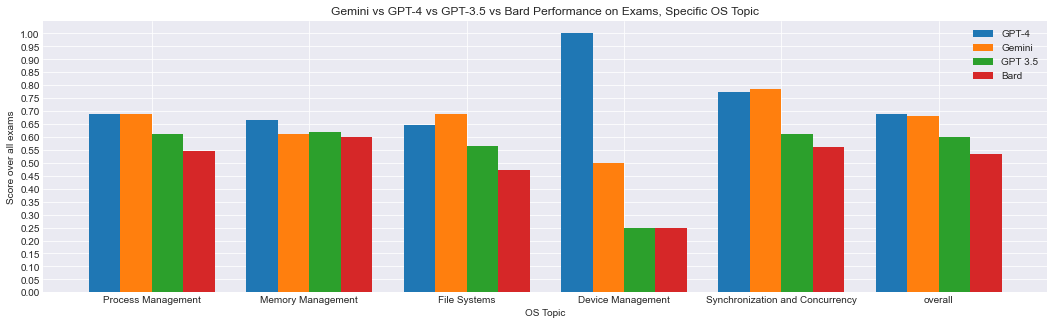

In [56]:
xax = np.arange(len(bard_df.loc[4].tolist()))
gpt = gpt35_df.loc[4]
b = bard_df.loc[4]
g4 = gpt4_df.loc[4]
gem = gemini_df.loc[4]
plt.figure(figsize=(18, 5))
plt.style.use('seaborn-darkgrid')
plt.bar(xax-0.3, g4, 0.2, label = 'GPT-4')
plt.bar(xax -0.1, gem, 0.2, label = 'Gemini')
plt.bar(xax+0.1, gpt, 0.2, label = 'GPT 3.5')
plt.bar(xax + 0.3, b, 0.2, label = 'Bard')



plt.xticks(xax, bard_df.columns)
plt.yticks(np.arange(0,1.05,0.05))
plt.xlabel("OS Topic")
plt.ylabel("Score over all exams")
plt.title("Gemini vs GPT-4 vs GPT-3.5 vs Bard Performance on Exams, Specific OS Topic")

plt.legend()
plt.savefig('ostopic_overall.png')
plt.show()

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


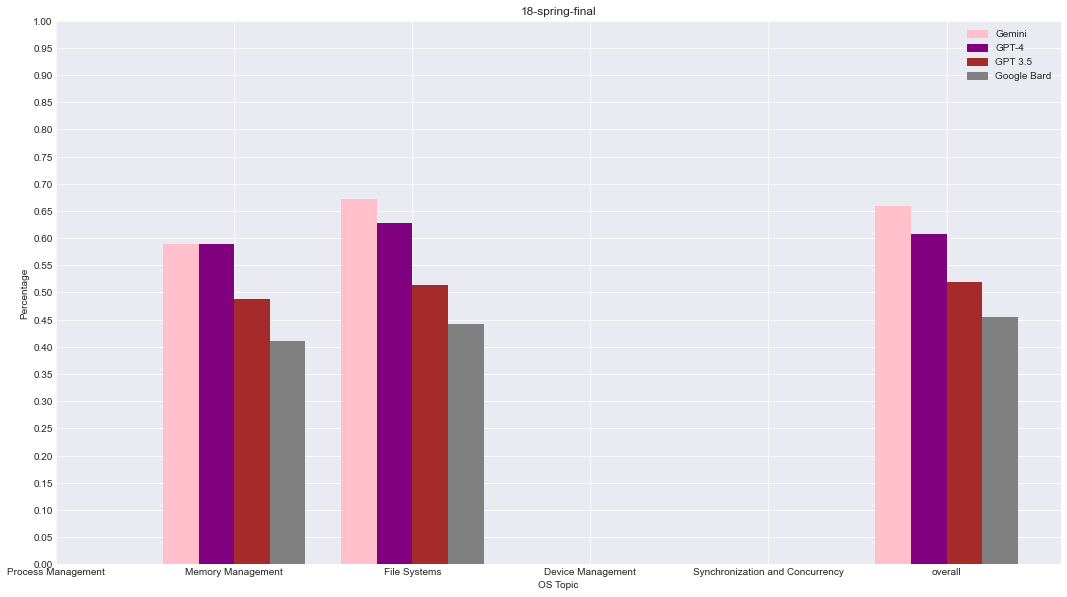

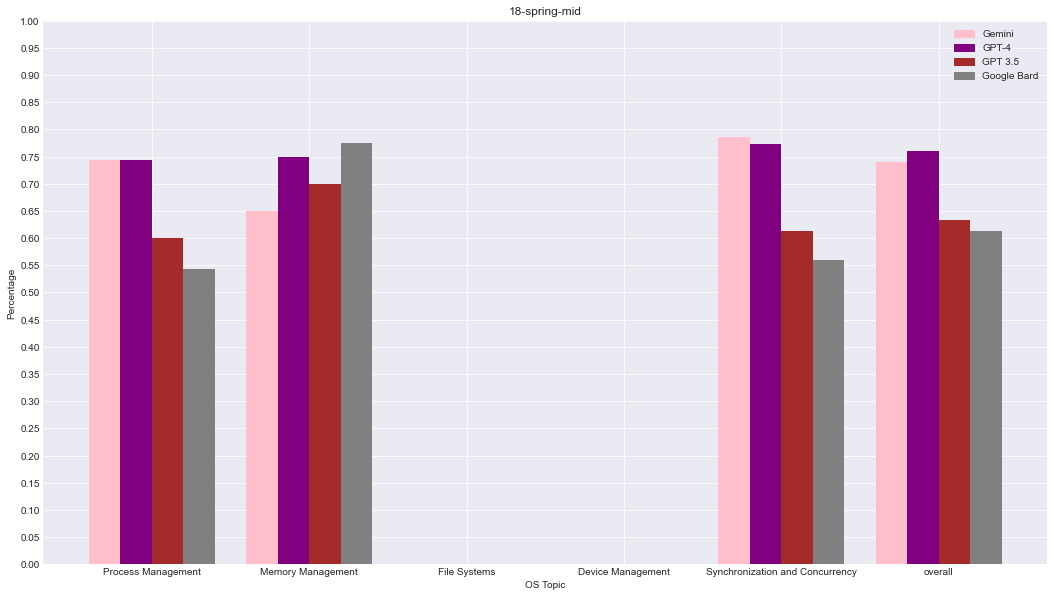

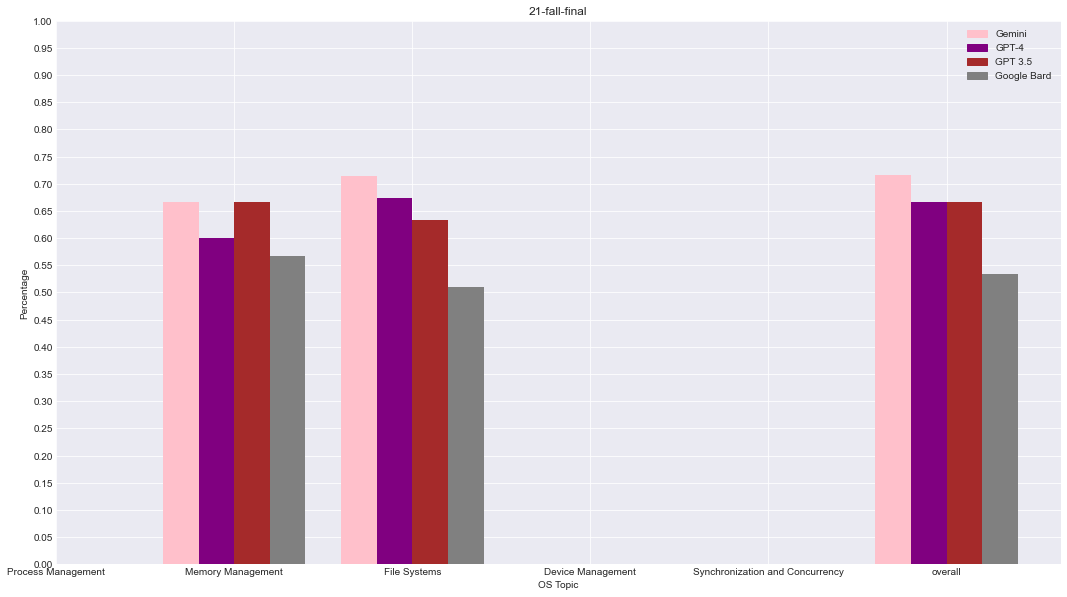

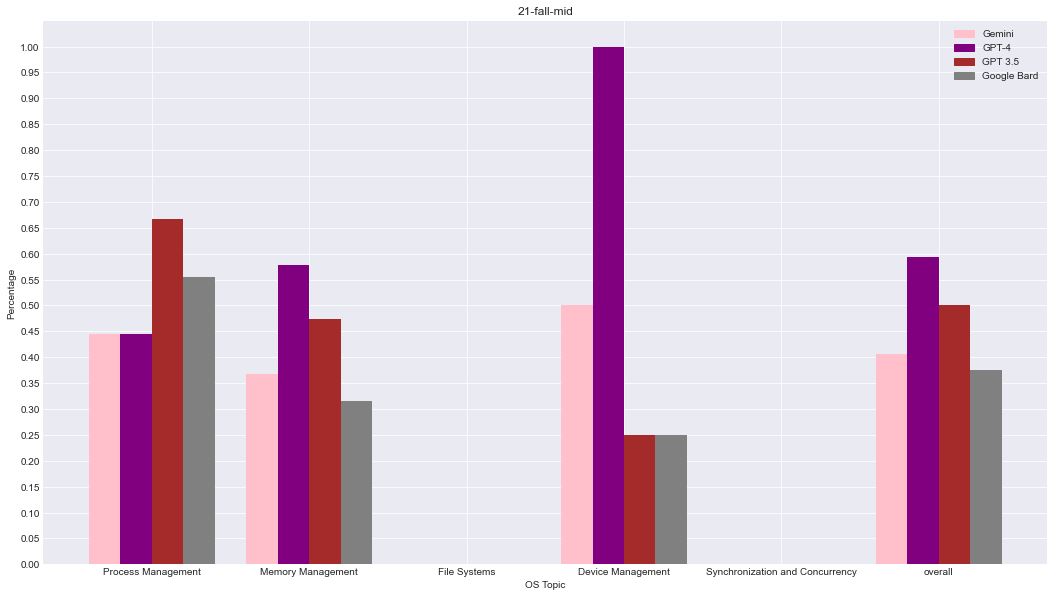

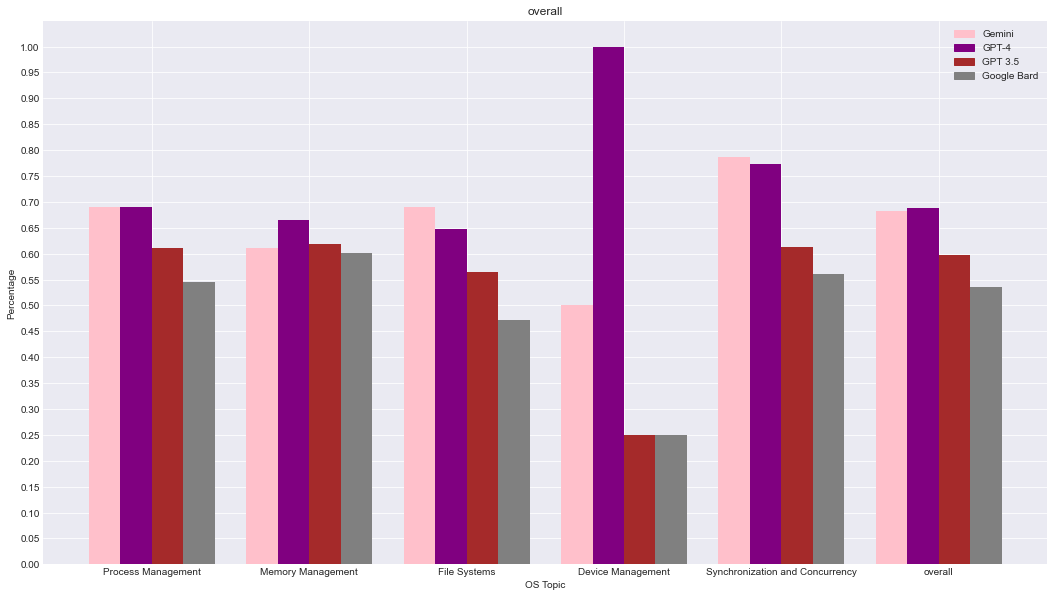

In [57]:
#graph
for i in range(5):
#     ax = axs[i]
#     matplotlib.style.use("tomato")
    fig, ax = plt.subplots(1,1)
    
    xax = np.arange(len(bard_df.loc[i]))#[~np.isnan(bard_df.loc[i])].tolist()))
    print(xax)
    gpt = gpt35_df.loc[i]
    gem= gemini_df.loc[i]
    b = bard_df.loc[i]
    g4 = gpt4_df.loc[i]
    ax.figure.set_size_inches(18, 10)
#     ax.figure(figsize=(18, 5))
#     ax.style.use('seaborn-darkgrid')
    plt.bar(xax -0.3, gem, 0.2, label = 'Gemini', color = "pink")
    plt.bar(xax-0.1, g4, 0.2, label = 'GPT-4', color = "purple")
    plt.bar(xax+0.1, gpt, 0.2, label = 'GPT 3.5', color = "brown")
    plt.bar(xax + 0.3, b, 0.2, label = 'Bard', color = "grey")
    
    
#     print(bard_df.loc[1][~np.isnan(bard_df.loc[1])].index.tolist())

    ax.set_xticks(xax, bard_df.loc[i].index.tolist())
    ax.set_xlabel("OS Topic")
    plt.yticks(np.arange(0,1.05,0.05))
    ax.set_ylabel("Percentage")    
    ax.set_title(exams.iat[i,0])
    ax.legend(handles = [mpatches.Patch(color='pink', label='Gemini'),mpatches.Patch(color='purple', label='GPT-4'),mpatches.Patch(color='brown', label='GPT 3.5'),mpatches.Patch(color='grey', label='Google Bard')])
        
    fig.savefig(exams.iat[i,0]+'_ostopic.png')